In [2]:
import numpy as np
vel_train=np.load('/home/pramuk/IISC/sn-mnn-auv-nav/dataset/TrainAndValidation/V.npy')
vel_test=np.load('/home/pramuk/IISC/sn-mnn-auv-nav/dataset/Test/V_test.npy')
imu_train=np.load('/home/pramuk/IISC/sn-mnn-auv-nav/dataset/TrainAndValidation/IMU_in.npy')
imu_test=np.load('/home/pramuk/IISC/sn-mnn-auv-nav/dataset/Test/IMU_in_test.npy')
print(vel_test.shape,vel_train.shape,imu_train.shape,imu_test.shape)


(3, 2001) (3, 13886) (3, 1388600, 2) (3, 200100, 2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
T=100
print(len(imu_train[0, :, 0]) // T)
X_acc = np.zeros((len(imu_train[0, :, 0])//T, 3))
Z = np.zeros((len(imu_train[0, :, 0]) // T, 3))
n=0
vel_train=vel_train.transpose()

for t in range(0, len(imu_train[0, :, 0]) - 1, T):
    X_acc[n,:]=(imu_train[:,t, 0])
    z = vel_train[n, :]
    Z[n, :] = z
    n=n+1
    
#print(imu_train[:,0:100,0])
df=pd.DataFrame(Z)
print(df)
#print(X_acc)
#pd.DataFrame(X_acc.reshape(X_acc.shape[0],X_acc.shape[1]))
# vel_train=pd.DataFrame(imu_train.T)
# vel_test=pd.DataFrame(vel_test.T)
# vel_train.info()
# imu_train=pd.DataFrame(imu_train.T)
# imu_test=pd.DataFrame(imu_test.T)
# u=vel_train[float(0)]
# v=vel_train[float(1)]
# w=vel_train[float(2)]
# plt.figure(0)
# plt.plot(u)
# plt.figure(1)
# plt.plot(v)
# plt.figure(2)
# plt.plot(w)
# print(u)
# print(v)
# print(w)


13886
              0         1         2
0      0.404004 -0.351841 -0.286382
1      0.505260 -0.523671  0.007160
2      0.362068 -0.539011  0.082846
3      0.204558 -0.446959  0.142168
4      0.500144 -0.655608 -0.063413
...         ...       ...       ...
13881  0.051169 -0.110524 -0.128945
13882 -0.049122 -0.212861  0.281427
13883  0.151458 -0.431859  0.071635
13884  0.328499 -0.309056 -0.015350
13885 -0.058332 -0.325430 -0.216954

[13886 rows x 3 columns]


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dvl=pd.read_excel('/home/pramuk/IISC/AUV- Snapir/Tedelyne DVL/teledyne_navigator_measurements.xlsx')
dvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            24084 non-null  object
 1   Time            24084 non-null  object
 2   u               24084 non-null  object
 3   v               24084 non-null  object
 4   w               24084 non-null  object
 5   Errror [m/sec]  24084 non-null  object
 6   latitude        24084 non-null  object
 7   longitute       24084 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


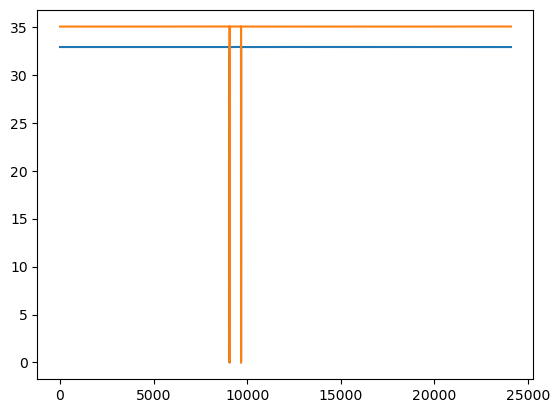

In [18]:
dvl= dvl[(dvl.longitute!='U') & (dvl.latitude!='U') & (dvl.u!='U') & (dvl.v!='U') & (dvl.w!='U')]
#dvl= dvl[dvl.latitude!='U']
x=dvl['latitude']
y=dvl['longitute']
t=dvl['Time']
plt.plot(x)
plt.plot(y)

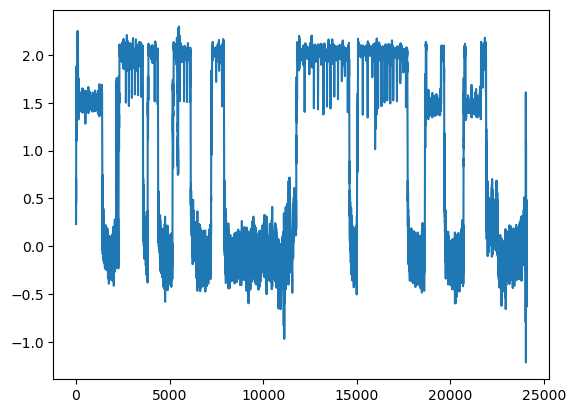

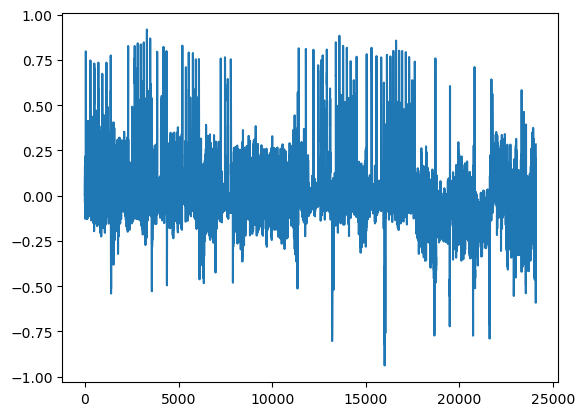

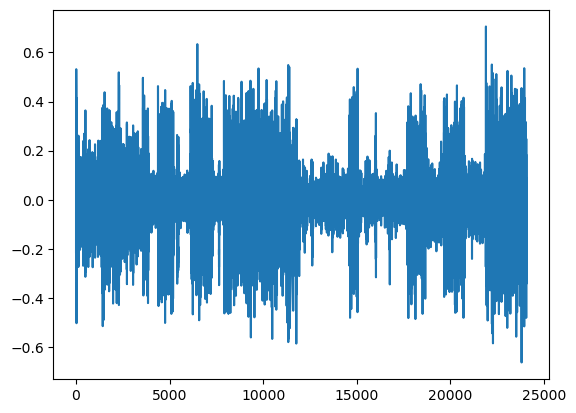

In [46]:
u=dvl['u']
v=dvl['v']
w=dvl['w']
plt.figure(0)
plt.plot(u)
plt.figure(1)
plt.plot(v)
plt.figure(2)
plt.plot(w)


[[ 0.404004 -0.351841 -0.286382]
 [ 0.50526  -0.523671  0.00716 ]
 [ 0.362068 -0.539011  0.082846]
 ...
 [ 0.151458 -0.431859  0.071635]
 [ 0.328499 -0.309056 -0.01535 ]
 [-0.058332 -0.32543  -0.216954]]


Text(0, 0.5, 'Predcition and Desired speed(z component) (m/s)')

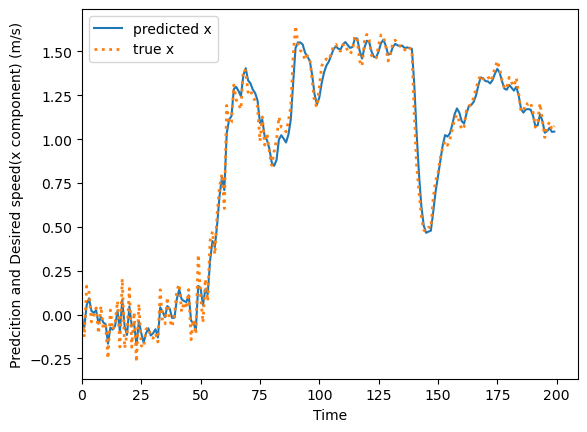

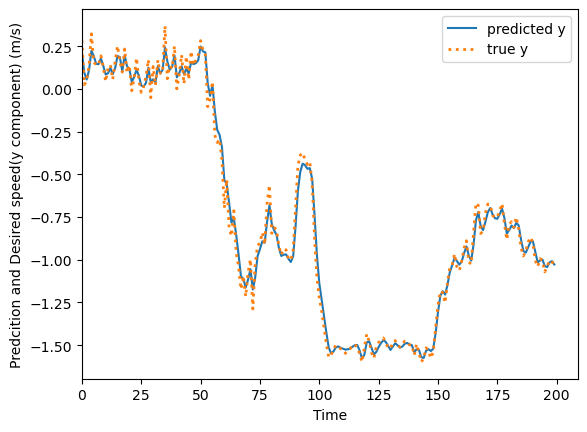

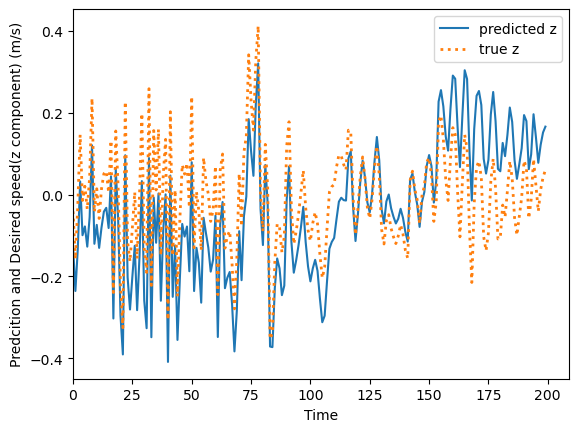

In [16]:
pred=pd.read_csv('/home/pramuk/IISC/sn-mnn-auv-nav/predictions.csv')
X_gyro = np.zeros((len(imu_train[0, :, 0]) // T, 3))
X_acc = np.zeros((len(imu_train[0, :, 0]) // T, 3))
Y = np.zeros((len(imu_train[0, :, 0]) // T, 4))
Z = np.zeros((len(imu_train[0, :, 0]) // T, 3))
# diff=pred.diff()
# plt.figure(4)
# plt.plot(diff['0'])
# plt.figure(5)
# plt.plot(diff['1'])
# plt.figure(6)
# plt.plot(diff['2'])

n = 0
V = vel_train
for t in range(0, len(imu_train[0, :, 0]) - 1, T):
    X_acc[n, :] = imu_train[:, t, 0]
    X_gyro[n, :] = imu_train[:, t, 1]
    #Y[n, :] = y
    z = V[n, :]
    #print(z)
    Z[n, :] = z
    n = n + 1
print(Z)
plt.figure(0)
plt.plot(range(0,200),pred['0'].iloc[10550:10750])
plt.plot(Z[10550:10750,0],linestyle=":",linewidth=2)
plt.xlim(xmin=0)
plt.legend(['predicted x','true x'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(x component) (m/s)")
plt.figure(1)
plt.plot(range(0,200),pred['1'].iloc[10550:10750])
plt.plot(range(0,200),Z[10550:10750,1],linestyle=":",linewidth=2)
plt.xlim(xmin=0)
plt.legend(['predicted y','true y'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(y component) (m/s)")
plt.figure(2)
plt.plot(range(0,200),pred['2'].iloc[10550:10750])
plt.plot(Z[10550:10750,2],linestyle=":",linewidth=2)
plt.legend(['predicted z','true z'])
plt.xlim(xmin=0)
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(z component) (m/s)")

Text(0, 0.5, 'Predcition and Desired speed(z component) (m/s)')

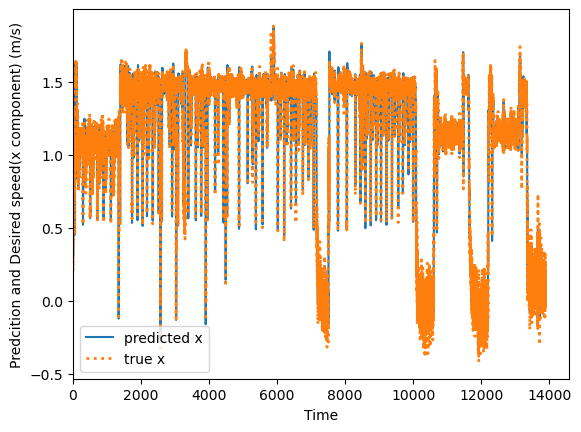

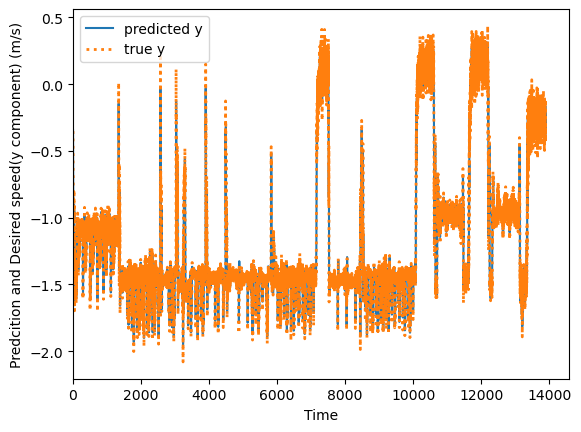

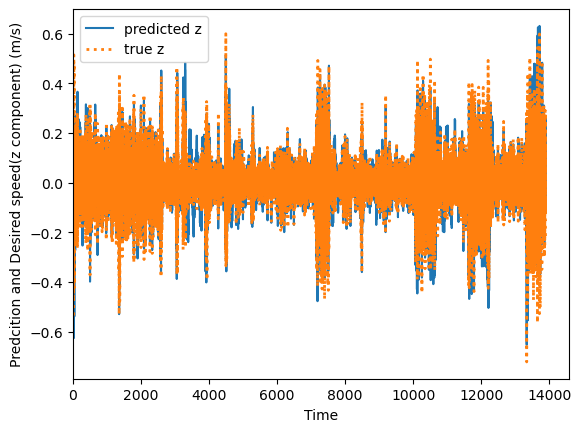

In [14]:
plt.figure(0)
plt.plot(pred['0'])
plt.plot(Z[:,0],linestyle=":",linewidth=2)
plt.xlim(xmin=0)
plt.legend(['predicted x','true x'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(x component) (m/s)")
plt.figure(1)
plt.plot(pred['1'])
plt.xlim(xmin=0)
plt.plot(Z[:,1],linestyle=":",linewidth=2)
plt.legend(['predicted y','true y'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(y component) (m/s)")
plt.figure(2)
plt.plot(pred['2'])
plt.xlim(xmin=0)
plt.plot(Z[:,2],linestyle=":",linewidth=2)
plt.legend(['predicted z','true z'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(z component) (m/s)")